## <font color='blue'>Tema 2.1: Regresión </font>

## <font color='blue'>2.1.1 Regresión lineal </font>

Para comprender mejor el problema de regresión, vamos analizar un problema real.

Los Trilotrópicos son insectos imaginarios que viven en las latitudes tropicales. Conocer su densidad de escamas es muy importante para poder saber qué insecticida aplicar. Pero **es muy costoso** contar las escamas.

Creemos que existe una relación entre la **longitud** y la **densidad de escamas** y queremos un modelo que prediga la densidad **a partir de la longitud**.

Esto es una tarea de regresión, ya que la predicción $\in \mathbb{R}$

Tenemos **datos anotados** (alguien contó las escamas de unos cuantos trilotrópicos) $\rightarrow$ estamos ante una tarea de **aprendizaje supervisado**

,timestamp,temperature,humidity
0,2023-01-01 00:00:00,20.385751,37.325543
1,2023-01-01 00:05:00,NaN,43.055720
2,2023-01-01 00:10:00,NaN,39.172132
3,2023-01-01 00:15:00,18.318520,NaN
4,2023-01-01 00:20:00,18.659693,38.004834


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    5761 non-null   datetime64[ns]
 1   temperature  5054 non-null   float64       
 2   humidity     5056 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 135.2 KB


None

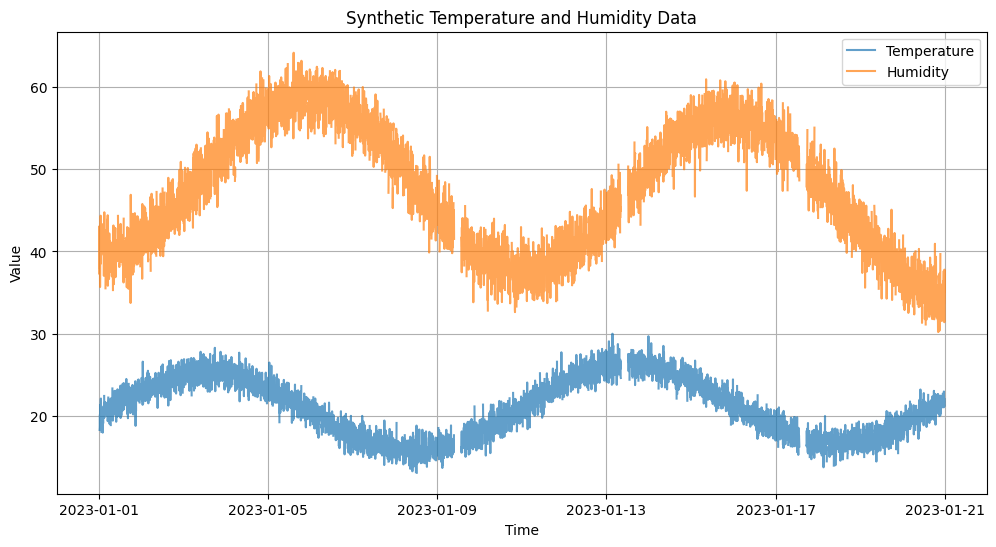

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate time series data
start_time = pd.to_datetime('2023-01-01')
end_time = start_time + pd.Timedelta(days=20)
time_index = pd.date_range(start=start_time, end=end_time, freq='5min')

# Generate synthetic temperature and humidity data
# Simulate a daily temperature cycle and a general trend
temperature = 20 + 5 * np.sin(np.linspace(0, 4 * np.pi, len(time_index))) + np.linspace(0, 2, len(time_index))
# Simulate a daily humidity cycle and inverse relationship with temperature
humidity = 50 - 10 * np.cos(np.linspace(0, 4 * np.pi, len(time_index))) - np.linspace(0, 5, len(time_index))

# Add noise to the data
noise_temp = np.random.normal(0, 1, len(time_index))
noise_hum = np.random.normal(0, 2, len(time_index))
temperature_noisy = temperature + noise_temp
humidity_noisy = humidity + noise_hum

# Introduce missing values
# Randomly set a percentage of data points to NaN
missing_percentage = 0.1
num_missing = int(missing_percentage * len(time_index))
missing_indices_temp = np.random.choice(len(time_index), num_missing, replace=False)
missing_indices_hum = np.random.choice(len(time_index), num_missing, replace=False)

temperature_noisy[missing_indices_temp] = np.nan
humidity_noisy[missing_indices_hum] = np.nan

# Introduce blocks of missing data (several hours)
# Define the duration of missing data blocks (in hours)
missing_block_duration_hours = 4
# Calculate the number of data points in a block
points_per_hour = 60 / 5  # 5-minute frequency
missing_block_points = int(missing_block_duration_hours * points_per_hour)

# Choose random start points for the missing blocks
# Ensure the block doesn't go beyond the data length
num_blocks = 3  # Number of missing blocks to introduce
for _ in range(num_blocks):
    start_index = np.random.randint(0, len(time_index) - missing_block_points)
    end_index = start_index + missing_block_points

    temperature_noisy[start_index:end_index] = np.nan
    humidity_noisy[start_index:end_index] = np.nan


# Create a pandas DataFrame
data = pd.DataFrame({
    'timestamp': time_index,
    'temperature': temperature_noisy,
    'humidity': humidity_noisy
})

# Display the first few rows and some info
display(data.head())
display(data.info())

# Plot the data to visualize
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['temperature'], label='Temperature', alpha=0.7)
plt.plot(data['timestamp'], data['humidity'], label='Humidity', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Temperature and Humidity Data')
plt.legend()
plt.grid(True)
plt.show()

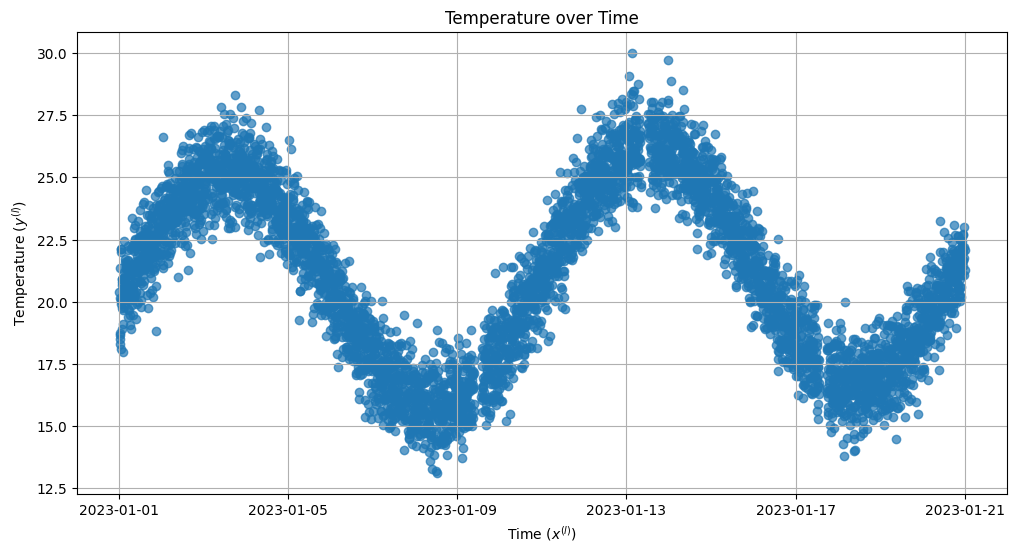

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['timestamp'], data['temperature'], alpha=0.7)
plt.xlabel('Time ($ x^{(l)})$')
plt.ylabel('Temperature ($y^{(l)}$)')
plt.title('Temperature over Time')
plt.grid(True)
plt.show()

In [ ]:
# Filter out rows with NaN values
data_filtered = data.dropna()

In [ ]:
x = data_filtered['timestamp']
y = data_filtered['temperature']



In [ ]:
x_numeric = x.astype(np.int64) // 10**9
display(x_numeric.head())

,timestamp
0,1672531200
4,1672532400
5,1672532700
6,1672533000
7,1672533300


In [ ]:
min = np.min(x_numeric)
max = np.max(x_numeric)
display(min)
display(max)

1672531200

1674259200

In [ ]:
x_numeric = (x_numeric - min) / (max - min)
display(x_numeric.head())

,timestamp
0,0.000000
4,0.000694
5,0.000868
6,0.001042
7,0.001215


In [ ]:
w1 = (np.mean(x_numeric*y)-np.mean(x_numeric)*np.mean(y))/(np.mean(x_numeric**2)-np.mean(x_numeric)**2)
w1

np.float64(-2.8644471611814155)

In [ ]:
w0 = np.mean(y)-w1*np.mean(x_numeric)
w0

np.float64(22.46790388874004)

In [ ]:
y_hat = w0 + w1*x_numeric

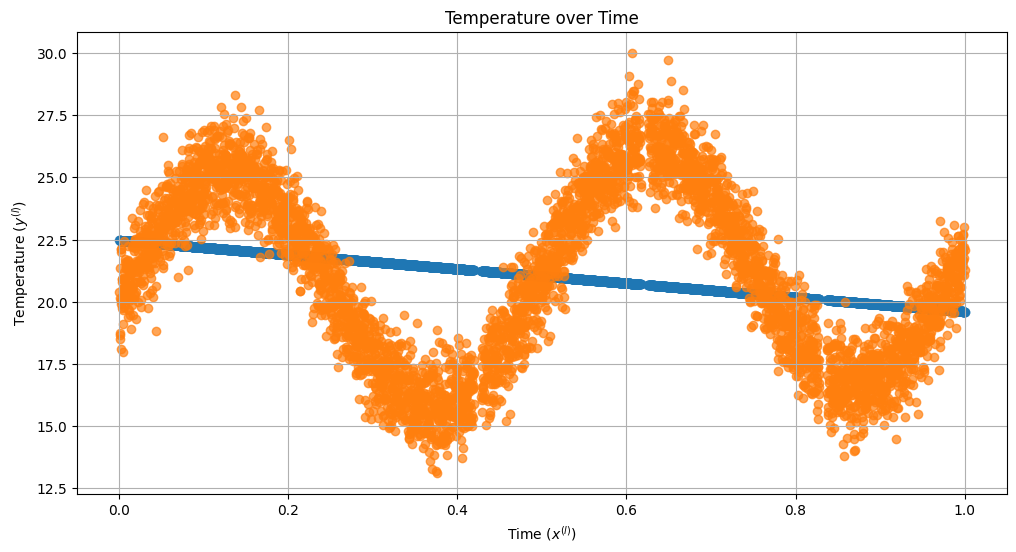

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(x_numeric, y_hat, alpha=0.7)
plt.scatter(x_numeric, y, alpha=0.7)
plt.xlabel('Time ($ x^{(l)})$')
plt.ylabel('Temperature ($y^{(l)}$)')
plt.title('Temperature over Time')
plt.grid(True)
plt.show()

In [ ]:
Xnew = 1673532500
Xnew = (Xnew - min) / (max - min)
ynew = w0 + w1*Xnew
ynew

np.float64(20.808082741465185)

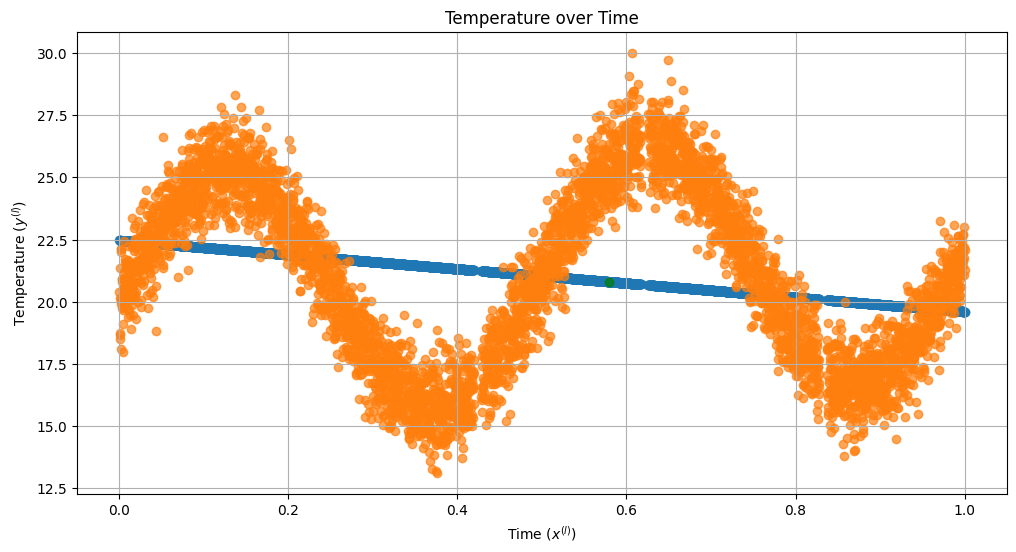

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(x_numeric, y_hat, alpha=0.7)
plt.scatter(x_numeric, y, alpha=0.7)
plt.scatter(Xnew, ynew, alpha=0.7, c='g')
plt.xlabel('Time ($ x^{(l)})$')
plt.ylabel('Temperature ($y^{(l)}$)')
plt.title('Temperature over Time')
plt.grid(True)
plt.show()

Optimized weights (w):
[[22.05408966]
 [-2.08970218]]
Optimized weights (w):
[[22.05408966]
 [-2.08970218]]


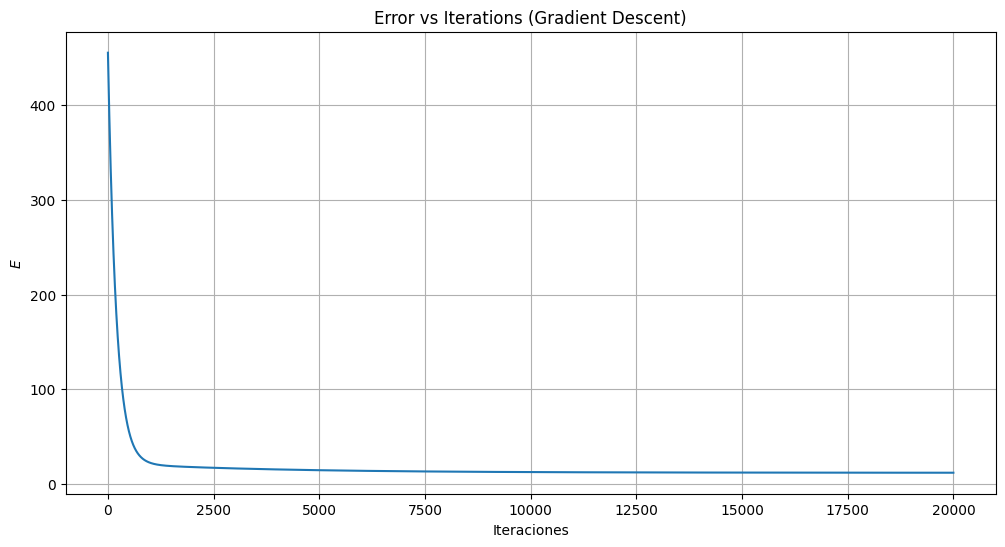

In [ ]:
#Initialization
# For a simple linear model with intercept and one feature
num_features = 2
MaxIter = 20000
w = np.random.randn(num_features).reshape(-1, 1) # Initialize w for 2 features
eta = 0.001
L = len(x_numeric) # Use the length of the filtered data for the number of samples
Error = np.zeros(MaxIter)
wt = np.zeros((MaxIter, num_features))
#
# Create the extended matrix Xe for a simple linear model
# Use x_numeric_filtered which contains the numerical representation of the timestamps
Xe = np.c_[np.ones(L), x_numeric]

# Assuming y is also filtered and corresponds to x_numeric_filtered
#y = y.values.reshape(-1, 1) # Ensure y is a column vector

#Iterations for Gradient Descent
for i in range(MaxIter):
    # Calculate the prediction
    y_hat = np.dot(Xe, w)

    # Calculate the error (difference between prediction and actual)
    error = y_hat - y

    # Calculate the Mean Squared Error
    Error[i] = np.sum(error**2) / L

    # Calculate the gradient
    # The gradient of the MSE is (2/L) * Xe.T * error
    gradient = (2/L) * np.dot(Xe.T, error)

    # Update the weights
    w = w - eta * gradient
    wt[i] = w.flatten()

# Print the final weights
print("Optimized weights (w):")
print(w)
#Gráfica
print("Optimized weights (w):")
print(w)

plt.figure(figsize=(12, 6))
plt.plot(Error)
plt.xlabel('Iteraciones')
plt.ylabel('$E$')
plt.title('Error vs Iterations (Gradient Descent)')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Pesos')

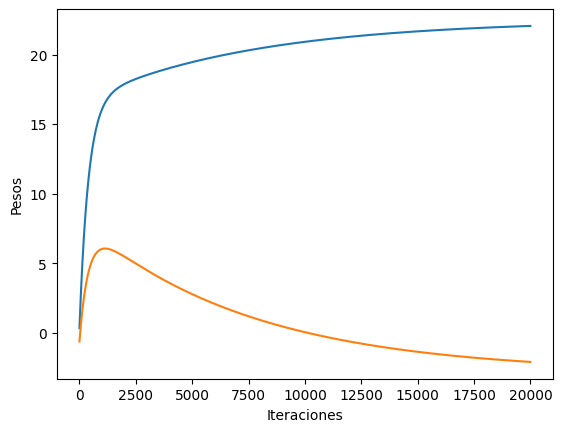

In [ ]:
plt.plot(wt[:, 0], label='w0')
plt.plot(wt[:, 1], label='w1')
plt.xlabel('Iteraciones')
plt.ylabel('Pesos')

In [ ]:
y_hat = np.dot(Xe, w)

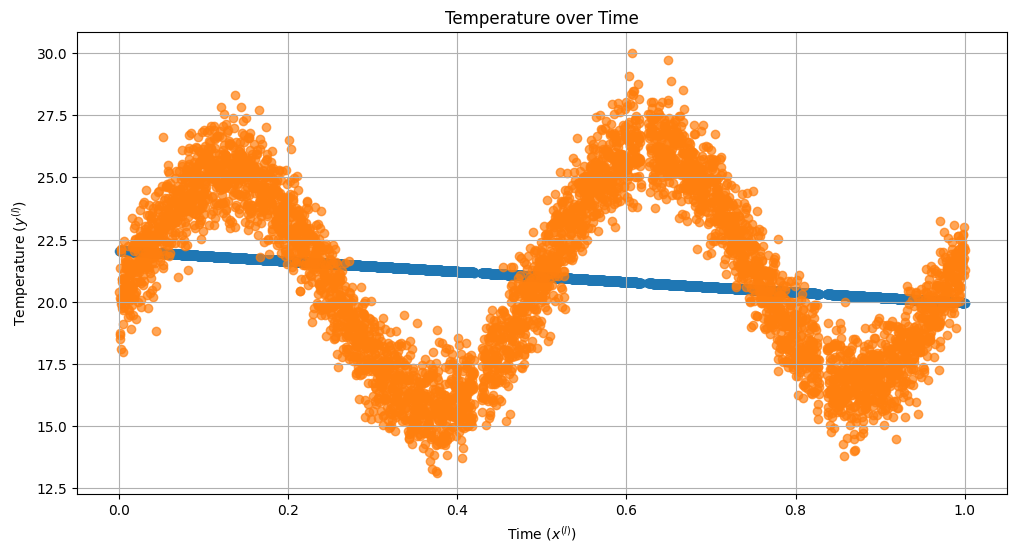

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(x_numeric, y_hat, alpha=0.7)
plt.scatter(x_numeric, y, alpha=0.7)
plt.xlabel('Time ($ x^{(l)})$')
plt.ylabel('Temperature ($y^{(l)}$)')
plt.title('Temperature over Time')
plt.grid(True)
plt.show()

Optimized weights (w):
[[21.08901391]
 [ 1.40364858]
 [ 2.0365082 ]
 [-2.44926639]
 [-2.07241226]
 [-0.68799254]
 [-2.29539524]
 [ 2.0091697 ]]
Optimized weights (w):
[[21.08901391]
 [ 1.40364858]
 [ 2.0365082 ]
 [-2.44926639]
 [-2.07241226]
 [-0.68799254]
 [-2.29539524]
 [ 2.0091697 ]]


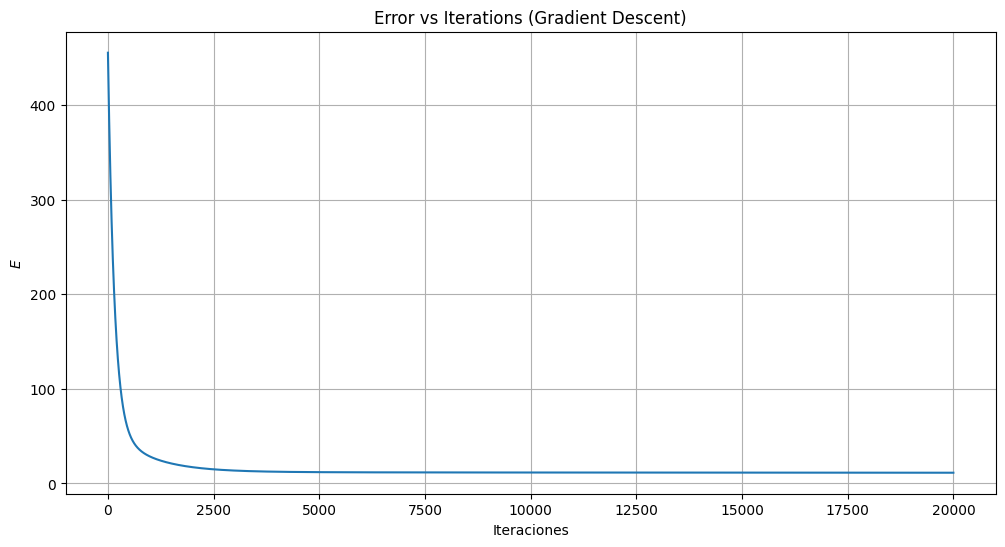

In [ ]:
#Initialization
# For a simple linear model with intercept and one feature
# Create the extended matrix Xe for a simple linear model
# Use x_numeric_filtered which contains the numerical representation of the timestamps
Xe = np.c_[np.ones(L), x_numeric, x_numeric**2, x_numeric**3, x_numeric**4, x_numeric**5, x_numeric**6, x_numeric**75 ]
num_features = Xe.shape[1]
MaxIter = 20000
w = np.random.randn(num_features).reshape(-1, 1) # Initialize w for 2 features
eta = 0.001
L = len(x_numeric) # Use the length of the filtered data for the number of samples
Error = np.zeros(MaxIter)
wt = np.zeros((MaxIter, num_features))
#
# Assuming y is also filtered and corresponds to x_numeric_filtered
#y = y.values.reshape(-1, 1) # Ensure y is a column vector

#Iterations for Gradient Descent
for i in range(MaxIter):
    # Calculate the prediction
    y_hat = np.dot(Xe, w)

    # Calculate the error (difference between prediction and actual)
    error = y_hat - y

    # Calculate the Mean Squared Error
    Error[i] = np.sum(error**2) / L

    # Calculate the gradient
    # The gradient of the MSE is (2/L) * Xe.T * error
    gradient = (2/L) * np.dot(Xe.T, error)

    # Update the weights
    w = w - eta * gradient
    wt[i] = w.flatten()

# Print the final weights
print("Optimized weights (w):")
print(w)
#Gráfica
print("Optimized weights (w):")
print(w)

plt.figure(figsize=(12, 6))
plt.plot(Error)
plt.xlabel('Iteraciones')
plt.ylabel('$E$')
plt.title('Error vs Iterations (Gradient Descent)')
plt.grid(True)
plt.show()

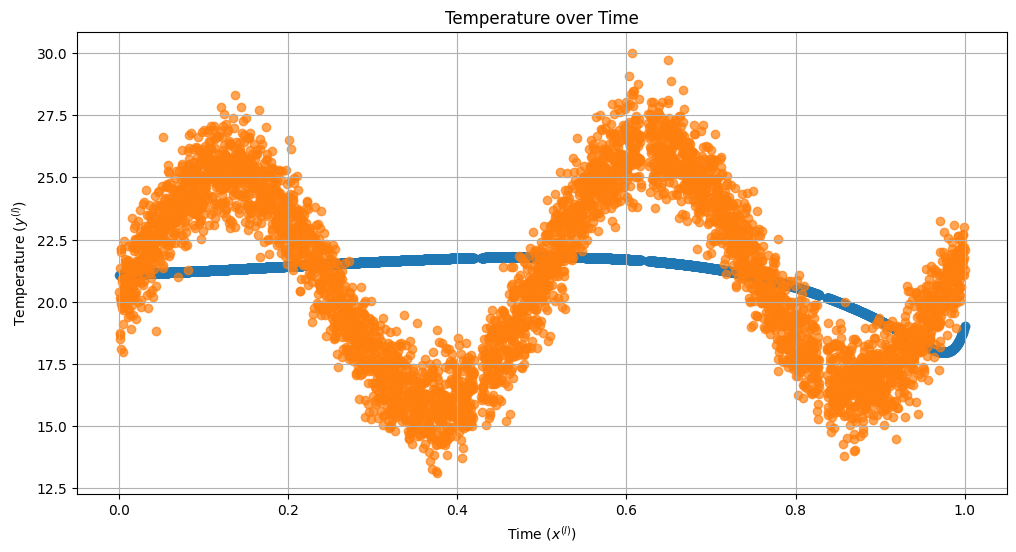

In [ ]:
y_hat = np.dot(Xe, w)
plt.figure(figsize=(12, 6))
plt.scatter(x_numeric, y_hat, alpha=0.7)
plt.scatter(x_numeric, y, alpha=0.7)
plt.xlabel('Time ($ x^{(l)})$')
plt.ylabel('Temperature ($y^{(l)}$)')
plt.title('Temperature over Time')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#d = pd.read_csv("trilotropicos.csv") # Cargamos los datos del formato csv
d = pd.read_csv("/content/drive/MyDrive/DOCENCIA/PreGrado/MachineLearning/ML-UCSP/CONTENIDO 2025/Dataset/trilotropicos.csv") # Cargamos los datos del formato csv
print (d.shape) # imprimimos el tamaño de los datos


(150, 2)


In [ ]:
d.head()

,longitud,densidad_escamas
0,3.817195,8.810027
1,2.154586,12.980476
2,6.223221,9.507771
3,5.898173,7.812593
4,5.553022,8.818914


In [ ]:
d.describe()

,longitud,densidad_escamas
count,150.000000,150.000000
mean,4.649952,9.351058
std,1.464408,1.966953
min,2.004841,6.121526
25%,3.329030,7.901306
50%,4.637731,8.904112
75%,5.857153,10.350212
max,6.991100,15.191007


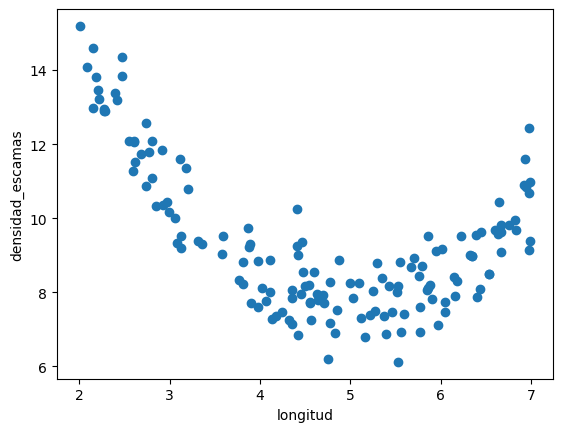

In [ ]:
plt.scatter(d.longitud, d.densidad_escamas)
plt.xlabel(d.columns[0])
plt.ylabel(d.columns[1]);

In [ ]:
x = d.longitud
y = d.densidad_escamas

In [ ]:
w0 = np.mean(y)-w1*np.mean(x)
w0
w1 = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
w1

np.float64(-0.7180590760985439)

# Cómo se diseña un algoritmo ML

Paso 1. Elegir de qué parámetros depende una predicción $\rightarrow$ se define **cómo** es un modelo.

Paso 2. Definir una función que mida el error de la predicción.

Paso 3. Determinar qué valores de los parámetros minimizan el error de predicción.

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  Paso 1. Elegimos la forma del modelo

**Entrada**
- $x^{(l)}$: longitud del trilotrópico $l$

**Salida esperada**
- $y^{(l)}$: densidad de escamas del trilotrópico $l$

**Predicción ** $\rightarrow$ decidimos que nuestro modelo tiene la siguiente forma

- $\hat{y}^{(l)} = w_0 + w_1 x^{(l)}$

La siguiente es una posible combinación de $w_0$ y $w_1$ seleccionada aleatoriamente. Ejecútalo varias veces para entender el error.

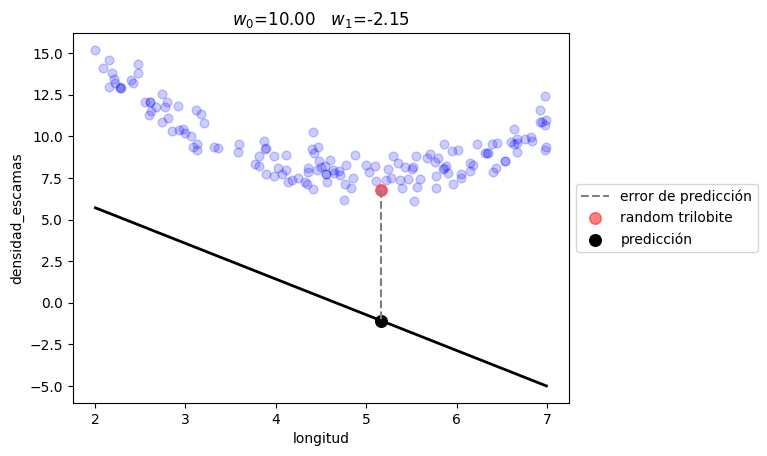

In [ ]:
def linear_prediction(w, x):
    w0,w1 = w
    return w0 + w1*x

def plot_model(w, prediction):
    xr = np.linspace(np.min(d.longitud), np.max(d.longitud), 100)
    plt.scatter(d.longitud, d.densidad_escamas, s=40, alpha=.2, color="blue", label="")
    plt.plot(xr,prediction(w,xr), lw=2, color="black")
    plt.title("   ".join([r"$w_%d$=%.2f"%(i, w[i]) for i in range(len(w))]));

    p = d.iloc[np.random.randint(len(d))]
    pred = prediction(w, p.longitud)
    plt.plot([p.longitud, p.longitud], [p.densidad_escamas, pred], ls="--", color="gray", label=u"error de predicción")
    plt.scatter(p.longitud, p.densidad_escamas, s=70, alpha=.5, color="red", label="random trilobite")
    plt.scatter(p.longitud, pred, s=70, alpha=1., color="black", label=u"predicción")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xlabel(d.columns[0])
    plt.ylabel(d.columns[1]);

#Aquí comienza nuestro ejemplo

w0 = np.random.random()*5+10
w1 = np.random.random()*4-3

plot_model([w0,w1], linear_prediction)

### Paso 2. Definimos una medida de error

Para un dato cualquiera $(l)$
$$
\begin{align}
err^{(l)} &= (\hat{y}^{(l)}-y^{(l)})^2\\
&=(w_0 + w_1 x^{(l)} - y^{(l)})^2
\end{align}$$

Para todo el dataset

$$J(w_0, w_1) = \frac{1}{L} \sum_{l=0}^{L-1}(w_0 + w_1 x^{(l)} - y^{(l)})^2$$

si asumimos que

- $\mathbf{w} = [w_0, w_1]^{\top}$
- $\mathbf{x}_e^{(l)} = [1, x^{(l)}]^{\top}$

entonces podemos escribir de manera más compacta la expresión anterior:

$$J(\mathbf{w}) = \frac{1}{L} \sum_{l=0}^{L-1}(\mathbf{w}^{\top}  \mathbf{x}_e^{(l)} - y^{(l)})^2$$


$$J(w_0, w_1) = \frac{1}{L} \sum_{l=0}^{L-1}(w_0 + w_1 x^{(l)} - y^{(l)})^2$$

$$\frac{\partial J(w_0, w_1)}{\partial w_0}= 0$$
$$\frac{\partial J(w_0, w_1)}{\partial w_1}= 0$$

$$J(w_0, w_1) = \frac{1}{L} \sum_{l=0}^{L-1}(w_0 + w_1 x^{(l)} - y^{(l)})^2$$

$\frac{\partial J(w_0, w_1)}{\partial w_0}= 0$

$\frac{\partial J(w_0, w_1)}{\partial w_0}= 2\frac{1}{L} \sum_{l=0}^{L-1}(w_0 + w_1 x^{(l)} - y^{(l)})(1)=0$

$$\frac{1}{L} \sum_{l=0}^{L-1}(w_0 + w_1 x^{(l)} - y^{(l)})=0$$
$$\frac{1}{L} \sum_{l=0}^{L-1}w_0 + \frac{1}{L} \sum_{l=0}^{L-1}w_1 x^{(l)} - \frac{1}{L} \sum_{l=0}^{L-1}y^{(l)}=0$$

$$w_0\frac{1}{L} \sum_{l=0}^{L-1} + w_1\frac{1}{L} \sum_{l=0}^{L-1} x^{(l)} - \frac{1}{L} \sum_{l=0}^{L-1}y^{(l)}=0$$

$$w_0 + w_1\bar{x} - \bar{y}=0$$

$$\boxed{w_0 = \bar{y} - w_1\bar{x}}$$



$\frac{\partial J(w_0, w_1)}{\partial w_1}= 0$

$\frac{\partial J(w_0, w_1)}{\partial w_1}= 2\frac{1}{L} \sum_{l=0}^{L-1}(w_0 + w_1 x^{(l)} - y^{(l)})(x^{(l)})=0$

$$\frac{1}{L} \sum_{l=0}^{L-1}(w_0x^{(l)} + w_1 (x^{(l)})x^{(l)} - y^{(l)}x^{(l)})=0$$


$$w_0\frac{1}{L} \sum_{l=0}^{L-1}x^{(l)} + w_1\frac{1}{L} \sum_{l=0}^{L-1} (x^{(l)})x^{(l)} - \frac{1}{L} \sum_{l=0}^{L-1}y^{(l)}x^{(l)}=0$$

$$w_0\bar{x} + w_1\bar{xx} - \bar{yx}=0$$
$$(\bar{y} - w_1\bar{x})\bar{x} + w_1\bar{xx} - \bar{yx}=0$$

$$\bar{y}\bar{x} - w_1\bar{x}\bar{x} + w_1\bar{xx} - \bar{yx}=0$$

$$\boxed{w_1 =\frac{\bar{yx}-\bar{y}\bar{x}}{\bar{xx}-\bar{x}\bar{x}}}$$


In [ ]:
x = d.longitud
y = d.densidad_escamas

In [ ]:
d.shape[0]

150

In [ ]:
w1 = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
w1

np.float64(-0.7180590760985439)

In [ ]:
w0 = np.mean(y)-w1*np.mean(x)
w0

np.float64(12.689998055222247)

$$J(w_0, w_1) = \frac{1}{L} \sum_{l=0}^{L-1}(w_0 + w_1 x^{(l)} - y^{(l)})^2$$

In [ ]:
def J(t, x, y, prediction):
    return np.mean( (prediction(t,x)-y)**2)


In [ ]:
J([w0,w1], d.longitud, d.densidad_escamas, linear_prediction)

np.float64(2.7447662570801157)

### Paso 3. Obtenemos los parámetros que minimizan el error de predicción

observa cómo usamos un **algoritmo genérico de optimización**

In [ ]:
r1 = minimize(lambda w: J(w, d.longitud, d.densidad_escamas, linear_prediction), np.random.random(size=2))
r1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.744766257081141
        x: [ 1.269e+01 -7.181e-01]
      nit: 9
      jac: [-1.788e-06 -9.328e-06]
 hess_inv: [[ 5.572e+00 -1.090e+00]
            [-1.090e+00  2.337e-01]]
     nfev: 30
     njev: 10

error total 2.74


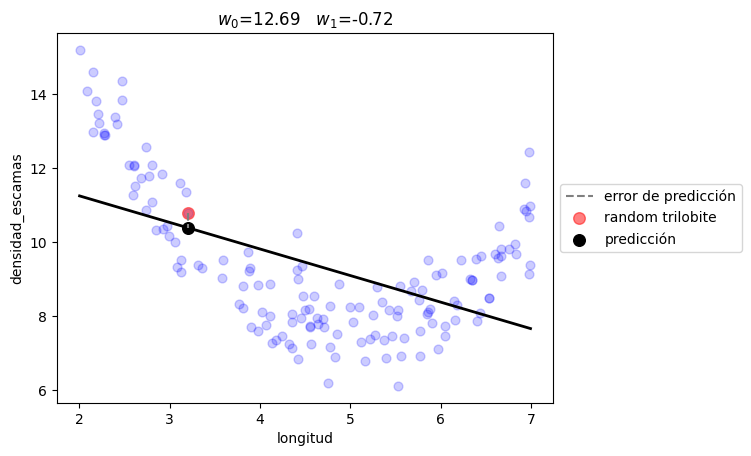

In [ ]:
plot_model(r1.x, linear_prediction)
print ("error total %.2f"%(J(r1.x, d.longitud, d.densidad_escamas, linear_prediction)))

El valor del parametros  $\mathbf{w}$ es aquel que minimiza la función de coste, es decir
$$\mathbf{w}^* = \mbox{arg mín}_{\mathbf{w}} \frac{1}{L} \sum_{l=0}^{L-1}(\mathbf{w}^{\top}  \mathbf{x}_e^{(l)} - y^{(l)})^2$$

Es decir

$$\mathbf{w}^* = \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}}= 0= \frac{1}{L} \sum_{l=0}^{L-1}2(\mathbf{w}^{\top}  \mathbf{x}_e^{(l)} - y^{(l)})\mathbf{x}_e^{(l)}$$

$$(\mathbf{w}^{\top}  \mathbf{x}_e)\mathbf{x}_e - y\mathbf{x}_e=0$$

$$(\mathbf{w}^{\top}  \mathbf{x}_e)\mathbf{x}_e = y\mathbf{x}_e$$
$$\mathbf{w}  (\mathbf{x}_e^{\top}\mathbf{x}_e) = y\mathbf{x}_e$$

$$\mathbf{w}   = \frac{y\mathbf{x}_e}{(\mathbf{x}_e^{\top}\mathbf{x}_e)}$$

$$\mathbf{w}   =(\mathbf{x}_e^{\top}\mathbf{x}_e)^{-1}{\mathbf{x}_e}^{\top}y$$




$$\boxed{\mathbf{w} = (\mathbf{X}_e^{\top}\mathbf{X}_e)^{-1} \mathbf{X}_e^{\top}\mathbf{Y}}$$

In [ ]:
Xe = np.r_[[[1]*d.shape[0], x]].T
Xe

array([[1.        , 3.81719503],
       [1.        , 2.15458566],
       [1.        , 6.22322052],
       [1.        , 5.89817339],
       [1.        , 5.55302222],
       [1.        , 4.35429913],
       [1.        , 6.38924925],
       [1.        , 4.34836838],
       [1.        , 4.76951819],
       [1.        , 5.27432663],
       [1.        , 4.60019675],
       [1.        , 5.02565012],
       [1.        , 4.8774403 ],
       [1.        , 4.41592621],
       [1.        , 3.58031643],
       [1.        , 2.55482531],
       [1.        , 4.55704217],
       [1.        , 2.74154462],
       [1.        , 4.06419836],
       [1.        , 3.89004904],
       [1.        , 2.19093768],
       [1.        , 2.2791554 ],
       [1.        , 6.43794492],
       [1.        , 6.04756129],
       [1.        , 6.34469428],
       [1.        , 3.8090916 ],
       [1.        , 5.96377452],
       [1.        , 6.9758375 ],
       [1.        , 3.31945729],
       [1.        , 2.47086758],
       [1.

In [ ]:
w = np.dot(np.dot(np.linalg.inv(np.dot(Xe.T,Xe)),Xe.T),y)
w

array([12.68999806, -0.71805908])

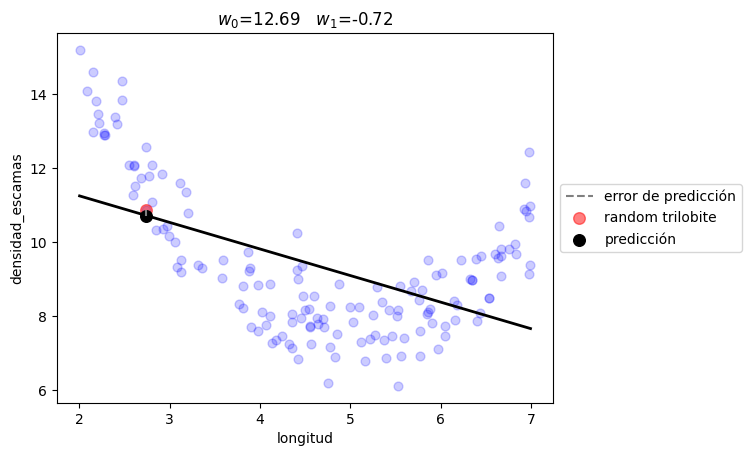

In [ ]:
plot_model(w, linear_prediction)

12.689998055222224 [-0.71805908]
error total 2.74


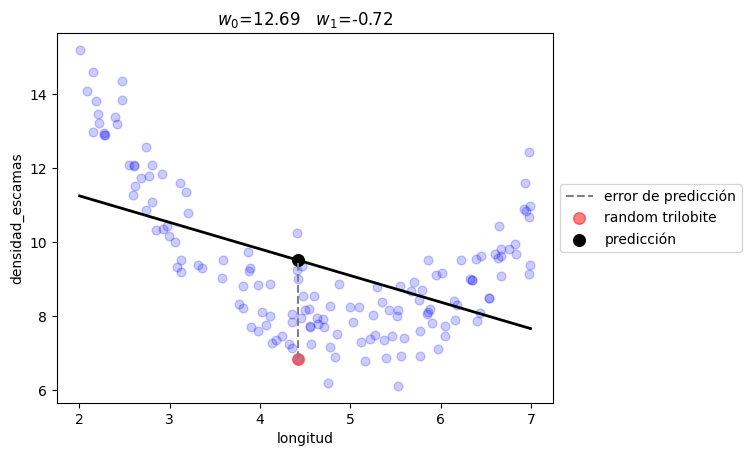

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(d.longitud.values.reshape(-1,1), d.densidad_escamas)
w0, w1 = LR.intercept_, LR.coef_
print (w0, w1)
plot_model([w0,w1[0]], linear_prediction)
print ("error total %.2f"%(J([w0, w1], d.longitud, d.densidad_escamas, linear_prediction)))

In [ ]:
LR

LinearRegression()

# Abriendo la caja negra de la optimización

**EN ML, NO ES POSIBLE USAR ALGORITMOS DE OPTIMIZACIÓN TAN GENÉRICOS**, debido a:

- la complejidad de los modelos.
- la participación de los datos en las expresiones.

p.ej. ¿cuántos términos tiene la siguiente expresión?

$$J(w_0, w_1) = \frac{1}{L} \sum_{l=0}^{L-1}(w_0 + w_1 x^{(l)} - y^{(l)})^2$$

### 1. El gradiente

para que la optimización funcione en ML **es necesario** calcular el gradiente de la función de pérdida (el conjunto de derivadas parciales). Observa [aquí](https://matthewebmckenna.com/posts/2017/05/gradient-descent-linear-regression) la derivación matemática del gradiente para el caso de regresión lineal (que en realidad es el más sencillo).

Usamos la notación vectorial: $\mathbf{w} = [w_0, w_1]^{\top}$, $\mathbf{X}_e = [1, x^{(l)}]^{\top} \in \mathbb{R}^{L\times 2}$ y la función de pérdida queda como:


y el gradiente

$$\nabla J = \begin{bmatrix}
\frac{\partial J}{\partial w_0}\\
\frac{\partial J}{\partial w_1}
\end{bmatrix} = \frac{1}{L}2\mathbf{X}_e^{\top}(\mathbf{w}^{\top}\mathbf{X}_e-Y)$$

Observa ahora que cuando usamos el gradiente la minimización es mucho más eficiente (número de evaluaciones `nfev`) .

**EN ML, SIN EL GRADIENTE LA OPTIMIZACIÓN NO ES POSIBLE**

In [ ]:
g = []

init_t = np.random.random()*40-5, np.random.random()*20-10

y = d.densidad_escamas.values
X = np.r_[[[1]*len(d), d.longitud.values]].T

def n_cost(t):
    return np.mean((X.dot(t)-y)**2)

def n_grad(t):
    return 2*X.T.dot(X.dot(t)-y)/len(X)

print ("sin usar el gradiente")
r = minimize(n_cost, init_t, method="BFGS")
print (r)

print ("\n usando el gradiente")
r = minimize(n_cost, init_t, method="BFGS", jac=n_grad)
print (r)


sin usar el gradiente
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.744766257080142
        x: [ 1.269e+01 -7.181e-01]
      nit: 6
      jac: [-5.960e-08 -5.066e-07]
 hess_inv: [[ 5.575e+00 -1.091e+00]
            [-1.091e+00  2.345e-01]]
     nfev: 21
     njev: 7

 usando el gradiente
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.7447662570801183
        x: [ 1.269e+01 -7.181e-01]
      nit: 6
      jac: [-9.798e-08 -5.020e-07]
 hess_inv: [[ 5.575e+00 -1.091e+00]
            [-1.091e+00  2.345e-01]]
     nfev: 7
     njev: 7


observa el mapa del coste respecto a todos los posibles valores de $w_0$ y $w_1$ en el caso de un modelo lineal.

en blanco **los valores óptimos**

### 2. la optimización como proceso iterativo

fíjate cómo la optimización busca un camino en el espacio de parámetros para llegar al mínimo.

In [ ]:
import itertools
def plot_cost(cost, t0_range, t1_range, vx=None,vy=None):
    k0,k1 = 40,40

    t0 = np.linspace(t0_range[0], t0_range[1], k0)
    t1 = np.linspace(t1_range[0], t1_range[1], k1)

    p = np.zeros((k0,k1))

    for i,j in itertools.product(range(k0), range(k1)):
        p[i,j] = np.log(cost(np.r_[t0[i],t1[j]]))

    plt.contourf(t0, t1, p.T, cmap=plt.cm.hot, levels=np.linspace(np.min(p), np.max(p), 20))
    plt.ylabel(r"$\theta_1$")
    plt.xlabel(r"$\theta_0$")
    plt.title("loss")
    plt.colorbar()

    if vx is not None:
        plt.axvline(vx, color="white")
    if vy is not None:
        plt.axhline(vy, color="white")

In [ ]:
g = []
loss_history = []
def log(xk):
    loss_history.append(loss(xk))
    g.append(xk)

init_t = np.random.random()*40-5, np.random.random()*20-10

loss = lambda t: J(t, d.longitud, d.densidad_escamas, linear_prediction)


r = minimize(loss, init_t, callback=log, method="BFGS")
r

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.7447662570802938
        x: [ 1.269e+01 -7.181e-01]
      nit: 6
      jac: [-6.855e-07 -3.576e-06]
 hess_inv: [[ 5.575e+00 -1.091e+00]
            [-1.091e+00  2.347e-01]]
     nfev: 21
     njev: 7

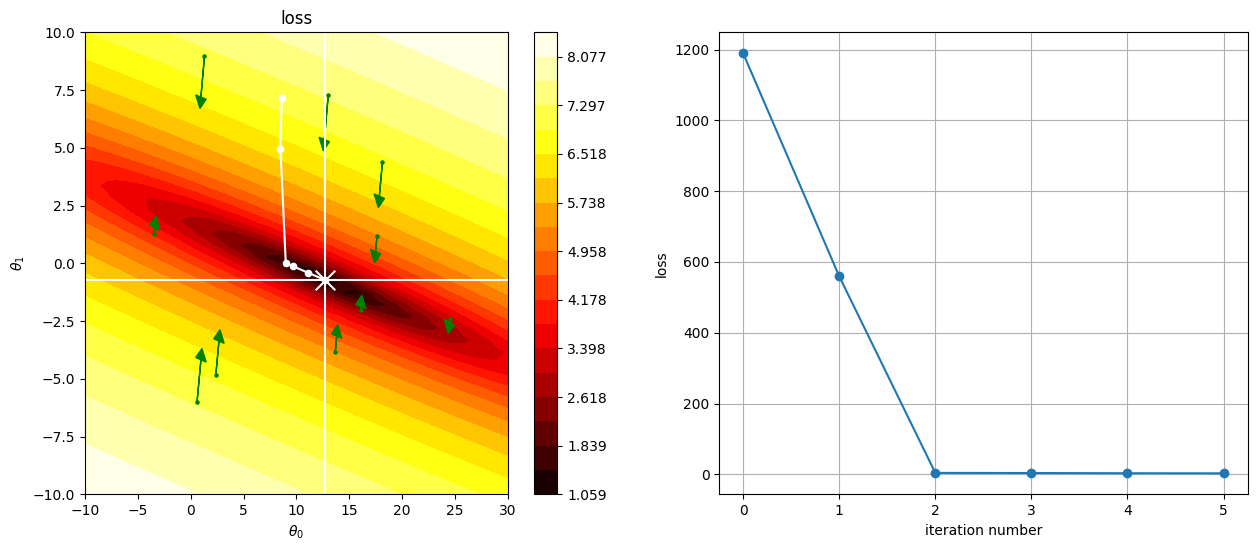

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plot_cost(loss, (-10,30), (-10,10), vx=r1.x[0], vy=r1.x[1])
g = np.r_[g]
plt.plot(g[:,0], g[:,1], color="white")
plt.scatter(g[:,0], g[:,1], color="white", s=20)
plt.scatter(g[-1,0], g[-1,1], marker="x", color="white", s=200)

# plot gradient at some points
for _ in range(10):
    t = np.random.random()*30-5, np.random.random()*20-10
    grad = n_grad(t)
    grad = grad/200
    plt.scatter(t[0],t[1], c="green", s=5)
    plt.arrow(t[0], t[1], -grad[0], -grad[1], head_width=1, head_length=0.5, fc='green', ec='green')

plt.subplot(122)
plt.plot(loss_history, marker="o")
plt.xlabel("iteration number")
plt.ylabel("loss")
plt.grid()

### Regresión múltiple

Supongamos que queremos modelar un conjunto de datos que tiene varias características (patrones) de la forma:

$$
f({\bf{x}},{\bf{w}} ) = w_0 + w_1 x_1 +  w_2 x_2 + \cdots + w_Nx_N
$$

donde $N$ es el número de características. ¿Cómo se ajusta ${\bf{w}}$?

<mark>El criterio (función de costo):</mark>
La función de error más usada es (<b>para un mismo modelo podemos tener diferentes criterios de ajuste</b>):
$$
E({\bf{w}}) = \frac{1}{2L}\sum_{l=0}^{L-1} \left\lbrace f({\bf{x}}^{(l)}, {\bf{w}}) - y^{(l)} \right\rbrace^2
$$
Con esta función de error podemos hallar una $f$ para la cual, la distancia perpendicular de los puntos $x^{(l)}$ a $f$ sea mínima.

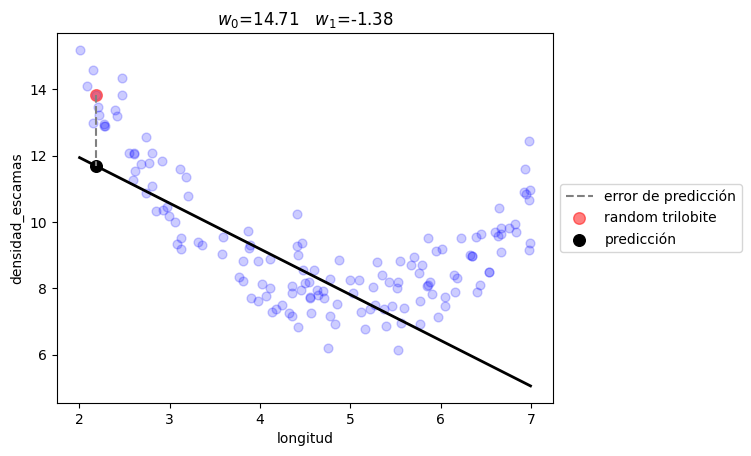

In [ ]:
def linear_prediction(w, x):
    w0,w1 = w
    return w0 + w1*x
w0 = np.random.random()*5+10
w1 = np.random.random()*4-3

plot_model([w0,w1], linear_prediction)

### Ejemplo con datos generados artificialmente:

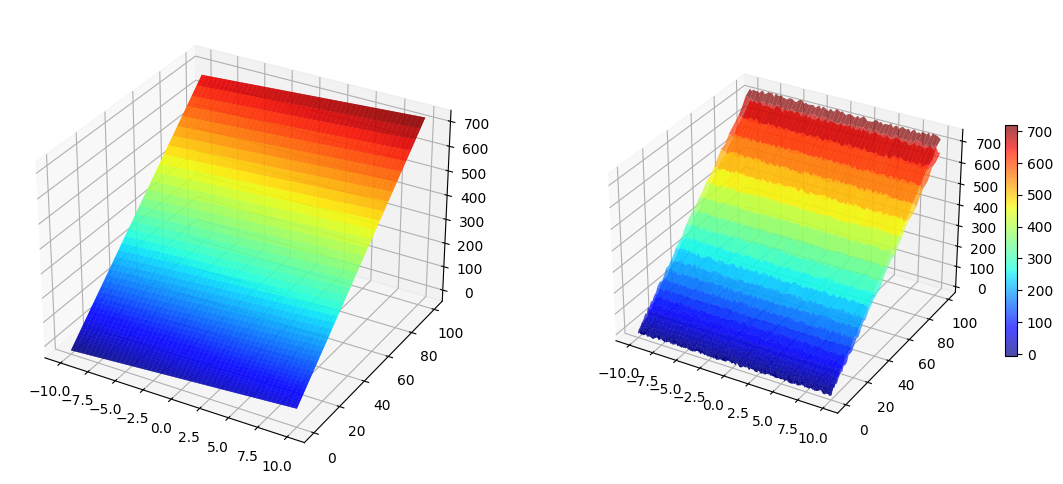

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
Perror = 0.1
fig = plt.figure(figsize=(14,6))
x1 = np.linspace(-10,10,100).reshape(100, 1)
x2 = x1**2

#Polinomio real
y = 3*x1 + 7*x2 - 2
X1, X2 = np.meshgrid(x1, x2)
Y = 3*X1 + 7*X2 - 2

#Asumimos que puede haber ruido en la medición
y2 = y + Perror*np.std(y)*(np.random.rand(100,1) - 0.5)
Y2 = y + Perror*np.std(y)*(np.random.rand(100,100) - 0.5)

#plots
ax = fig.add_subplot(1, 2, 1, projection='3d')
p=ax.plot_surface(X1, X2, Y, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
## surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X1, X2, Y2, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
cb = fig.colorbar(p, shrink=0.5)

### <font color='blue'>  Usando una estrategia de alto nivel (caja negra): </font>

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg =reg.fit(np.c_[x1,x2], y2)

In [ ]:
reg.intercept_

array([-1.13618751])

In [ ]:
reg.coef_

array([[3.18374654, 6.98512625]])

#### ¿Cómo hacemos una predicción?:

In [ ]:
y_hat = reg.predict(np.array([8,5]).reshape(1,-1))
y_hat

array([[59.25941601]])

#### ¿Y los parámetros del modelo?

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[[3.18374654 6.98512625]]
[-1.13618751]


In [ ]:
def ECM(w,x,y):
    w = w.reshape(1,-1)
    x = np.c_[x,np.ones((x1.shape[0],1))]
    return np.mean((np.dot(w,x.T).T-y)**2)

ECM(np.c_[reg.coef_,reg.intercept_], np.c_[x1,x2], y2)

33.044924855414735

### <font color='blue'>  Usando una estrategia de nivel intermedio: </font>

Sabemos que el problema que debemos resolver corresponde a un problema de minimización sin restricciones.

In [ ]:
from scipy.optimize import minimize
r1 = minimize(lambda w: ECM(w, np.c_[x1,x2], y2), np.random.random(size=3))
r1.x

array([ 3.1837465 ,  6.98512624, -1.13618737])

In [ ]:
ECM(r1.x, np.c_[x1,x2], y2)

33.0449248554149

#### También podemos hacerla predicción:

In [ ]:
np.dot(r1.x,np.array([8,5,1]))

59.25941580330151

### <font color='blue'>  Usando una estrategia de más bajo nivel: </font>

Un algoritmo simple que nos permite solucionar el problema de optimización es el <mark>**Algoritmo de Gradiente Descendente**</mark>. Un problema de optimización puede tener múltiples formas o algoritmos para resolverse, cuando el problema de optimización es <b>convexo</b> podemos esperar que casi con cualquier método encontremos el valor del parámetro que hace la función óptima, sin embargo, es posible que el problema de optimización no sea convexo, en cuyo caso el algoritmo o método de optimización juega un rol más importante. También es importante tener en cuenta la velocidad de convergencia del algoritmo o método de optimización, el costo computacional y el número de parámetros libres.

El algoritmo de gradiente descendente consiste en aplicar iterativamente la siguiente regla:

$$
w_n^{(iter)} = w_n^{(iter-1)} - \eta \frac{\partial E({\bf{w}})}{\partial w_n}
$$

donde $\eta$ se conoce como la tasa de aprendizaje.

Si queremos hayar un $\bf{w}$ que minimice el error en el problema de regresión lineal, entonces derivamos la función de error con respecto a cada uno de los parámetros $w_n$:

$$
\frac{\partial E({\bf{w}})}{\partial w_n} = \frac{1}{L}\sum_{l=0}^{L-1}\frac{\partial }{\partial w_n}\left( f({\bf{x}}^{(l)},{\bf{w}}) - y^{(l)}\right)^2\\
$$

Para efectos de cálculo podemos asumir que el vector ${\bf x}^{(l)}$ contiene todas las características de la muestra $l$ y una característica adicional con valor de 1, que multiplicará al término independiente $w_0$.

$$
\frac{\partial E({\bf{w}})}{\partial w_n} = \frac{1}{L}\sum_{l=0}^{L-1}\left( f({\bf{x}}^{(l)},{\bf{w}}) - y^{(l)}\right) \frac{\partial }{\partial w_n} f({\bf{x}}^{(l)}, {\bf{w}})
$$

$$
\frac{\partial E({\bf{w}})}{\partial w_n} = \frac{1}{L}\sum_{l=0}^{L-1}\left( f({\bf{x}}^{(l)},{\bf{w}}) - y^{(l)}\right)x_{n}^{(l)}
$$

La regla de actualización de los pesos en cada iteración estará entonces dada por:

$$
w_n(iter) = w_n(iter-1) - \eta \sum_{l=0}^{L-1}\left( f({\bf{x}}^{(l)},{\bf{w}}) - y^{(l)}\right)x_{n}^{(l)}
$$

$$
w_n(iter) = w_n(iter-1) - \eta \sum_{l=0}^{L-1}\left( \sum_{n=0}^{N} w_n x_{n}^{(l)} - y^{(l)}\right)x_{n}^{(l)}
$$

Si la solución de un problema requiere que sigamos una estrategia de más bajo nivel, entonces se hacen más importantes conceptos de algebra lineal y cálculo, en muchos casos no sólo para comprender los algoritmos, sino también para realizar implementaciones computacionalmente más eficientes.

#### Gradiente descendetente

[[ 3.18374654]
 [ 6.9701156 ]
 [-0.21767277]]


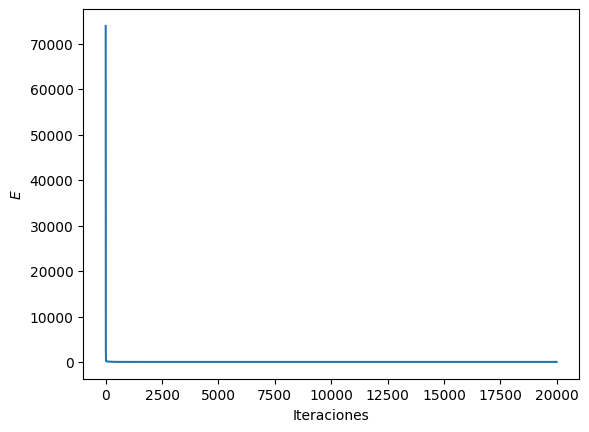

In [ ]:
#Inicialización
MaxIter = 20000
w = np.ones(3).reshape(3, 1)
eta = 0.000001
N = len(x1)
Error =np.zeros(MaxIter)

#Matriz extendida
X = np.array([x1,x2,np.ones((100,1))]).reshape(3, 100);

#Iteraciones
for i in range(MaxIter):
    tem = np.dot(X.T,w)
    tem2 = tem-np.array(y2)
    Error[i] = np.sum(tem2**2)/(N)
    tem = np.dot(X,tem2)
    w = w - eta*tem
#Gráfica
print(w)
#plt.ylim(0,1000)
#plt.xlim(0,1000)
plt.ion()
plt.plot(np.linspace(0,MaxIter,MaxIter),Error)
plt.xlabel('Iteraciones')
plt.ylabel('$E$')
plt.show()

In [ ]:
ECM(w, np.c_[x1,x2], y2)

33.4198265184336

,timestamp,temperature,humidity
0,2023-01-01 00:00:00,20.853763,38.819368
1,2023-01-01 00:05:00,21.797048,36.031194
2,2023-01-01 00:10:00,21.323700,37.101066
3,2023-01-01 00:15:00,20.219687,37.686963
4,2023-01-01 00:20:00,18.558844,41.442414


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    5761 non-null   datetime64[ns]
 1   temperature  5761 non-null   float64       
 2   humidity     5761 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 135.2 KB


None

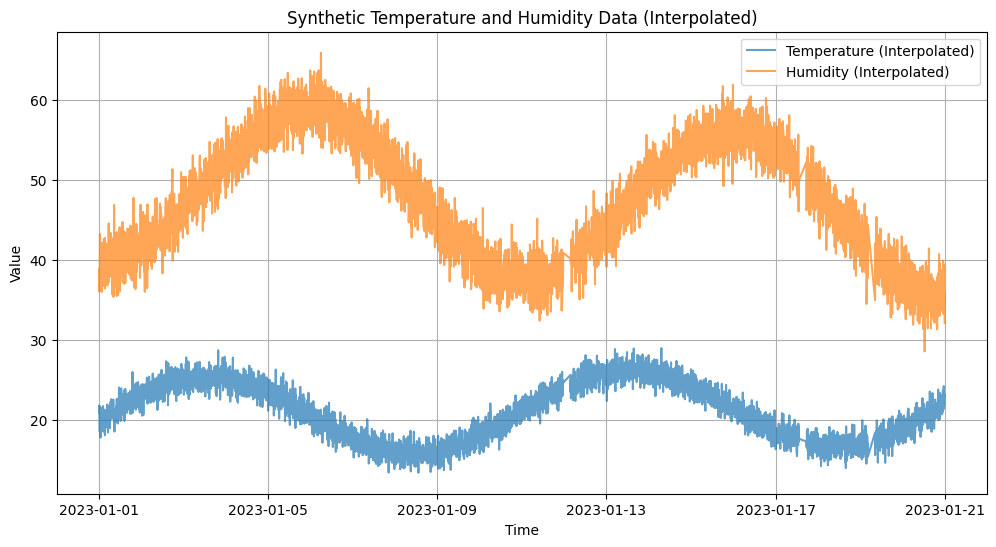

In [ ]:
# Perform linear interpolation to fill missing values
data_interpolated = data.copy()
data_interpolated['temperature'] = data_interpolated['temperature'].interpolate(method='linear')
data_interpolated['humidity'] = data_interpolated['humidity'].interpolate(method='linear')

# Display the first few rows and info to check for NaNs
display(data_interpolated.head())
display(data_interpolated.info())

# Plot the interpolated data to visualize
plt.figure(figsize=(12, 6))
plt.plot(data_interpolated['timestamp'], data_interpolated['temperature'], label='Temperature (Interpolated)', alpha=0.7)
plt.plot(data_interpolated['timestamp'], data_interpolated['humidity'], label='Humidity (Interpolated)', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Temperature and Humidity Data (Interpolated)')
plt.legend()
plt.grid(True)
plt.show()

$$ \phi(x) = \exp \left( -\frac{|x – \mu|^2}{2\sigma^2} \right) $$

Dónde:

$x$ es el punto de datos de entrada.

$\mu$ es el centro del RBF.

$\sigma$ es el ancho del RBF.

In [ ]:
def gaussian_rbf(x, center, sigma):
    return np.exp(-cdist(x, center, 'sqeuclidean') / (2 * sigma**2))